## Logging images and models

### Logging image files

Name: MyFirstMLflow


C:\Users\dof07\AppData\Local\Temp\ipykernel_8984\2191112145.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Run ID: 1650411c17b94011b7724ee66cca7375 
 Experiment ID: 446269725962928702 
 Status: RUNNING 
 Start time: 1741052958214 
 End time: None 
 Lifecycle_stage: active


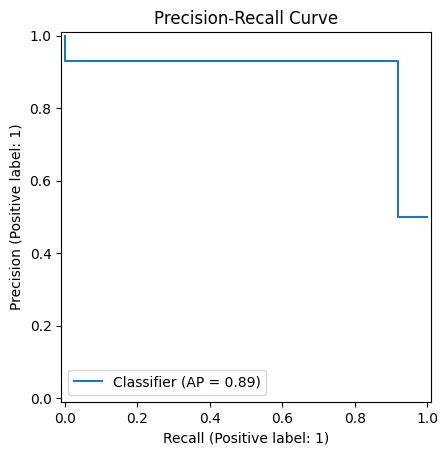

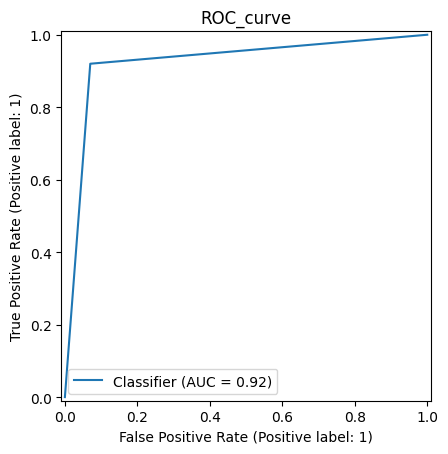

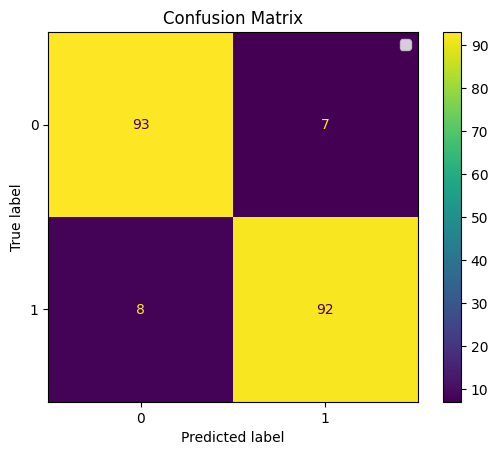

In [1]:
import mlflow
from mlflow_utils import get_mlflow_experiment

from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt 

if __name__=="__main__":
    experiment = get_mlflow_experiment(experiment_name="MyFirstMLflow")
    print("Name: {}".format(experiment.name))

    with mlflow.start_run(run_name="logging_images", experiment_id=experiment.experiment_id) as run:

        X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Random Forest
        rfc = RandomForestClassifier(n_estimators=100, random_state=42)
        rfc.fit(X_train, y_train)
        y_pred = rfc.predict(X_test)

        # Log the precision-recall curve
        fig_pr = plt.figure()
        pr_display = PrecisionRecallDisplay.from_predictions(y_test, y_pred, ax=plt.gca())
        plt.title("Precision-Recall Curve")
        plt.legend()

        mlflow.log_figure(fig_pr, "precision_recall_curve.png")

        # Log the ROC curve
        fig_roc = plt.figure()
        roc_display = RocCurveDisplay.from_predictions(y_test, y_pred, ax=plt.gca())
        plt.title("ROC_curve")
        plt.legend()

        mlflow.log_figure(fig_roc, "roc_curve.png")

        # Log the confusion matrix
        fig_cm = plt.figure()
        cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=plt.gca())
        plt.title("Confusion Matrix")
        plt.legend()

        mlflow.log_figure(fig_cm, "confusion_matrix.png")

        # Print run info
        print("Run ID: {}".format(run.info.run_id), "\n",
              "Experiment ID: {}".format(run.info.experiment_id), "\n",
              "Status: {}".format(run.info.status), "\n",
              "Start time: {}".format(run.info.start_time), "\n",
              "End time: {}".format(run.info.end_time), "\n",
              "Lifecycle_stage: {}".format(run.info.lifecycle_stage))

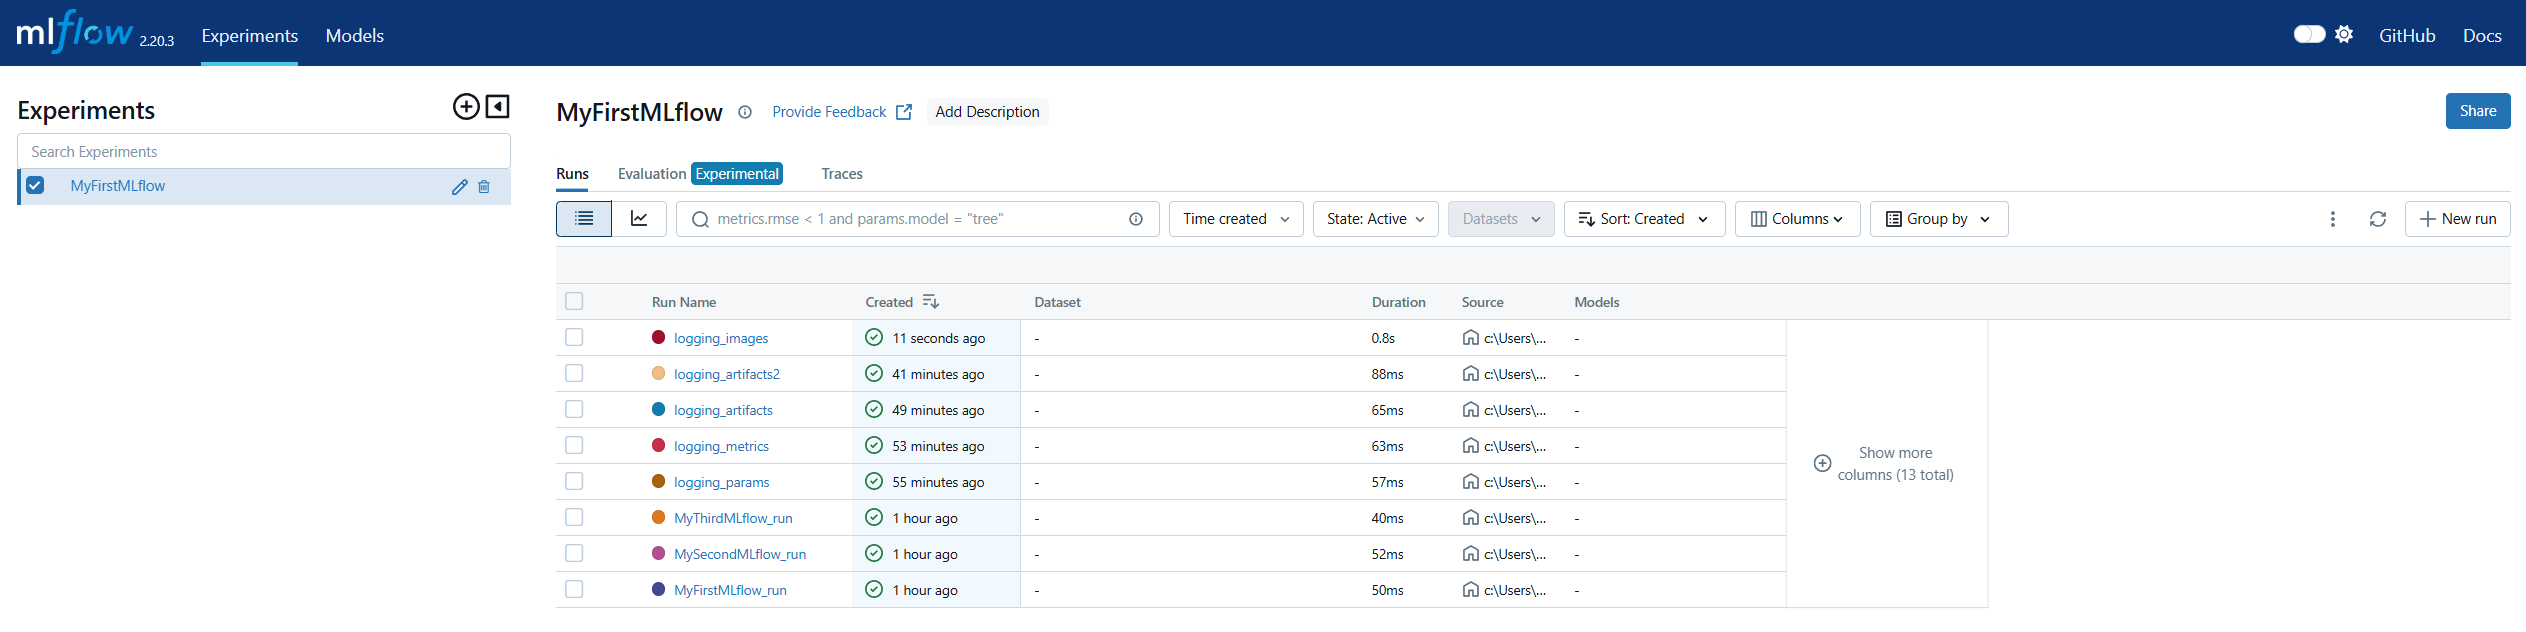

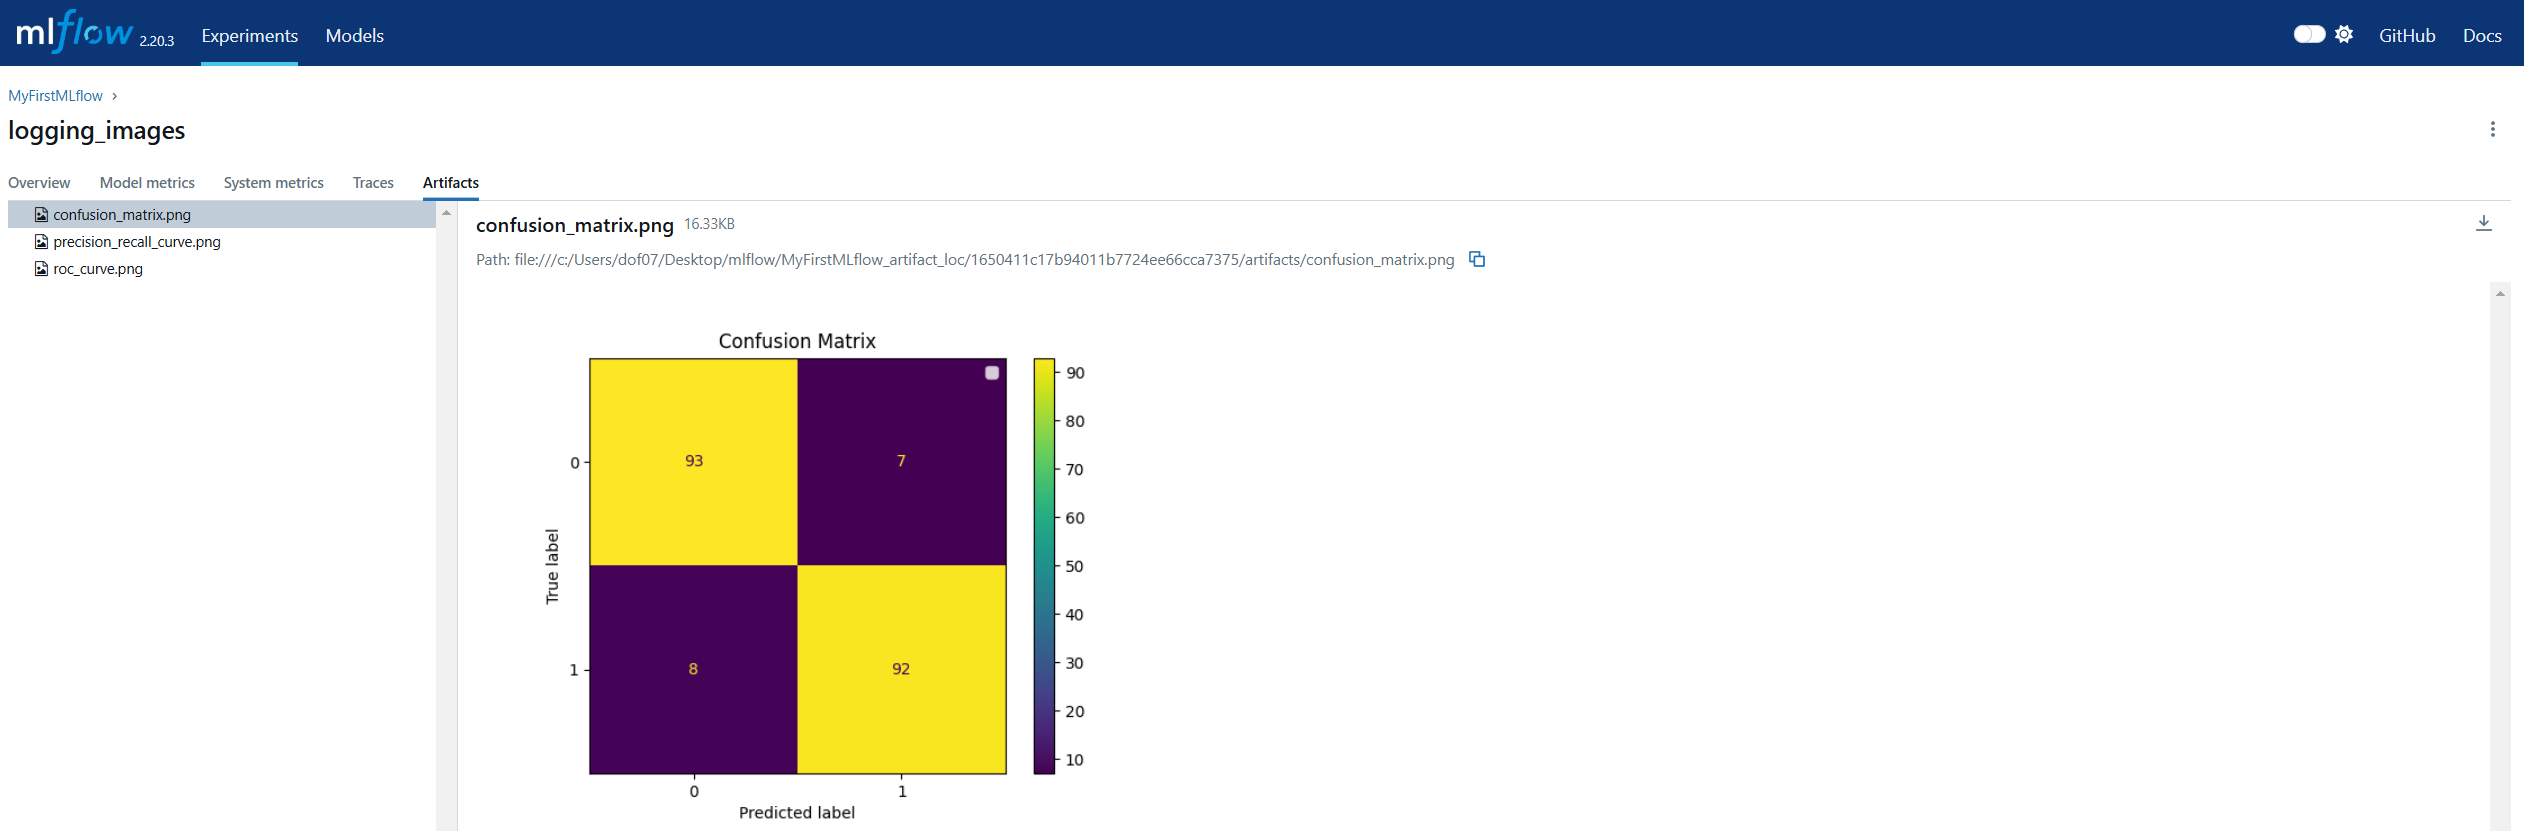

### Logging models

In [ ]:
import mlflow
from mlflow_utils import get_mlflow_experiment

from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt 

if __name__=="__main__":
    experiment = get_mlflow_experiment(experiment_name="MyFirstMLflow")
    print("Name: {}".format(experiment.name))

    with mlflow.start_run(run_name="auto_logging_models", experiment_id=experiment.experiment_id) as run:

        X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Log model parametres automatically
        mlflow.autolog()
        # mlflow.sklearn.autolog()

        # Random Forest
        rfc = RandomForestClassifier(n_estimators=100, random_state=42)
        rfc.fit(X_train, y_train)
        y_pred = rfc.predict(X_test)

        # Print run info
        print("Run ID: {}".format(run.info.run_id), "\n",
              "Experiment ID: {}".format(run.info.experiment_id), "\n",
              "Status: {}".format(run.info.status), "\n",
              "Start time: {}".format(run.info.start_time), "\n",
              "End time: {}".format(run.info.end_time), "\n",
              "Lifecycle_stage: {}".format(run.info.lifecycle_stage))

Name: MyFirstMLflow


2025/03/04 10:51:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


Run ID: 454163c2e9b54b4ab723074fc193d597 
 Experiment ID: 446269725962928702 
 Status: RUNNING 
 Start time: 1741053099971 
 End time: None 
 Lifecycle_stage: active


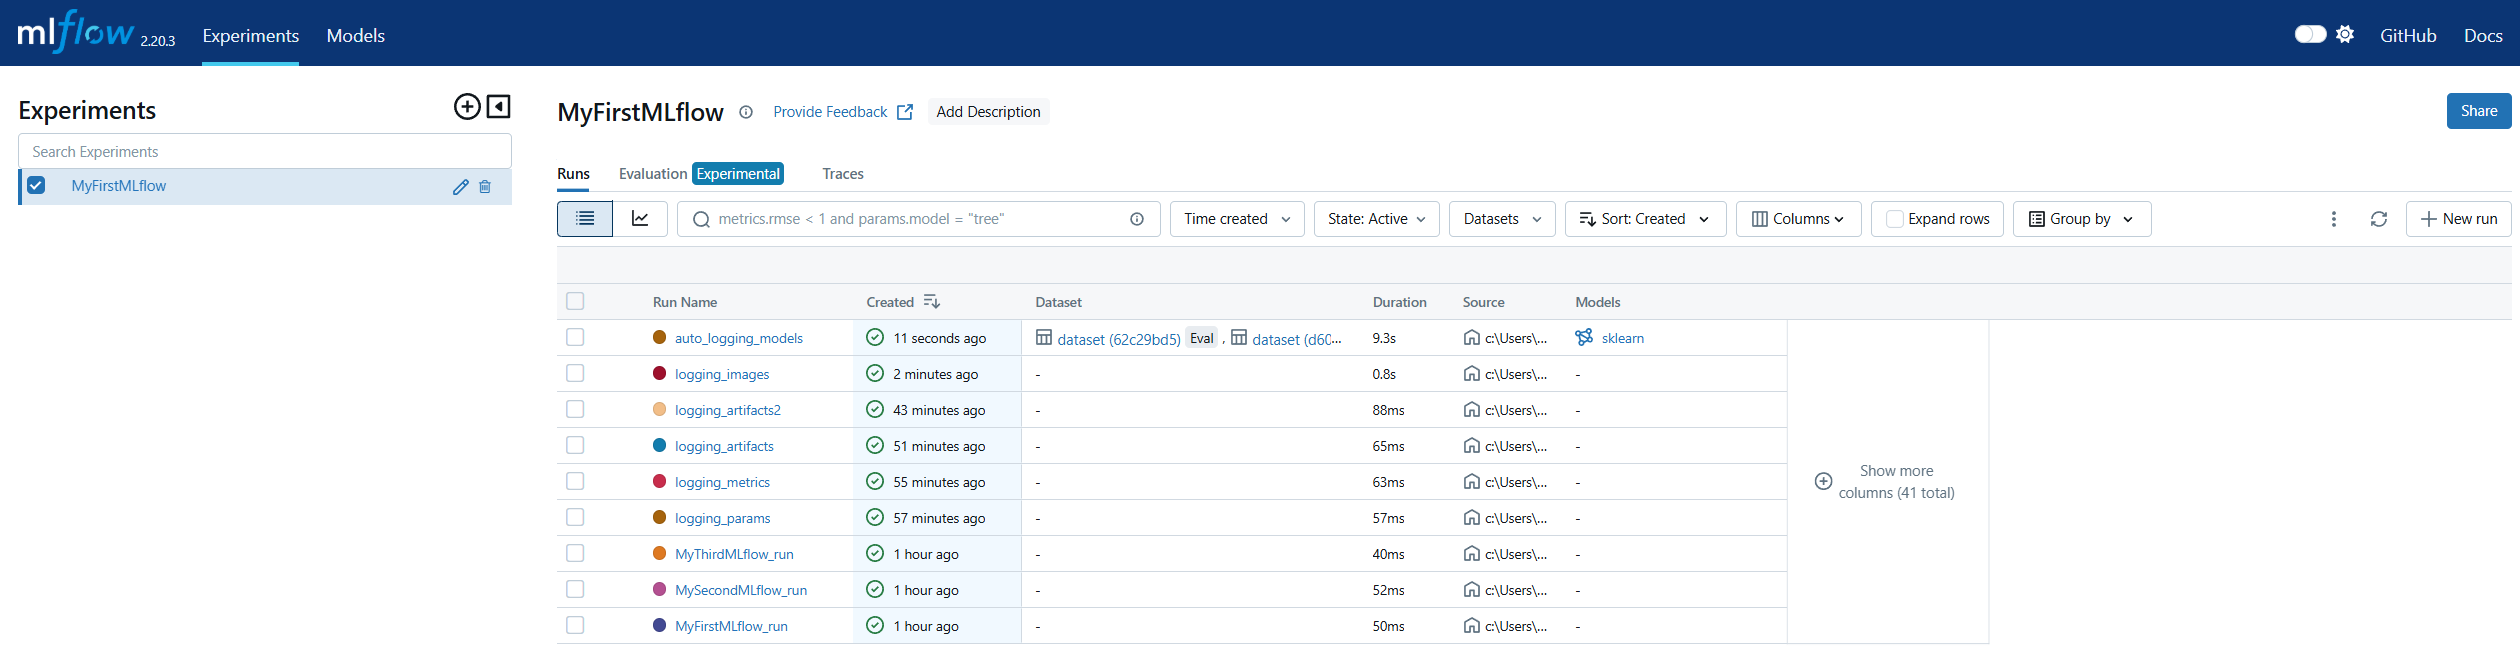

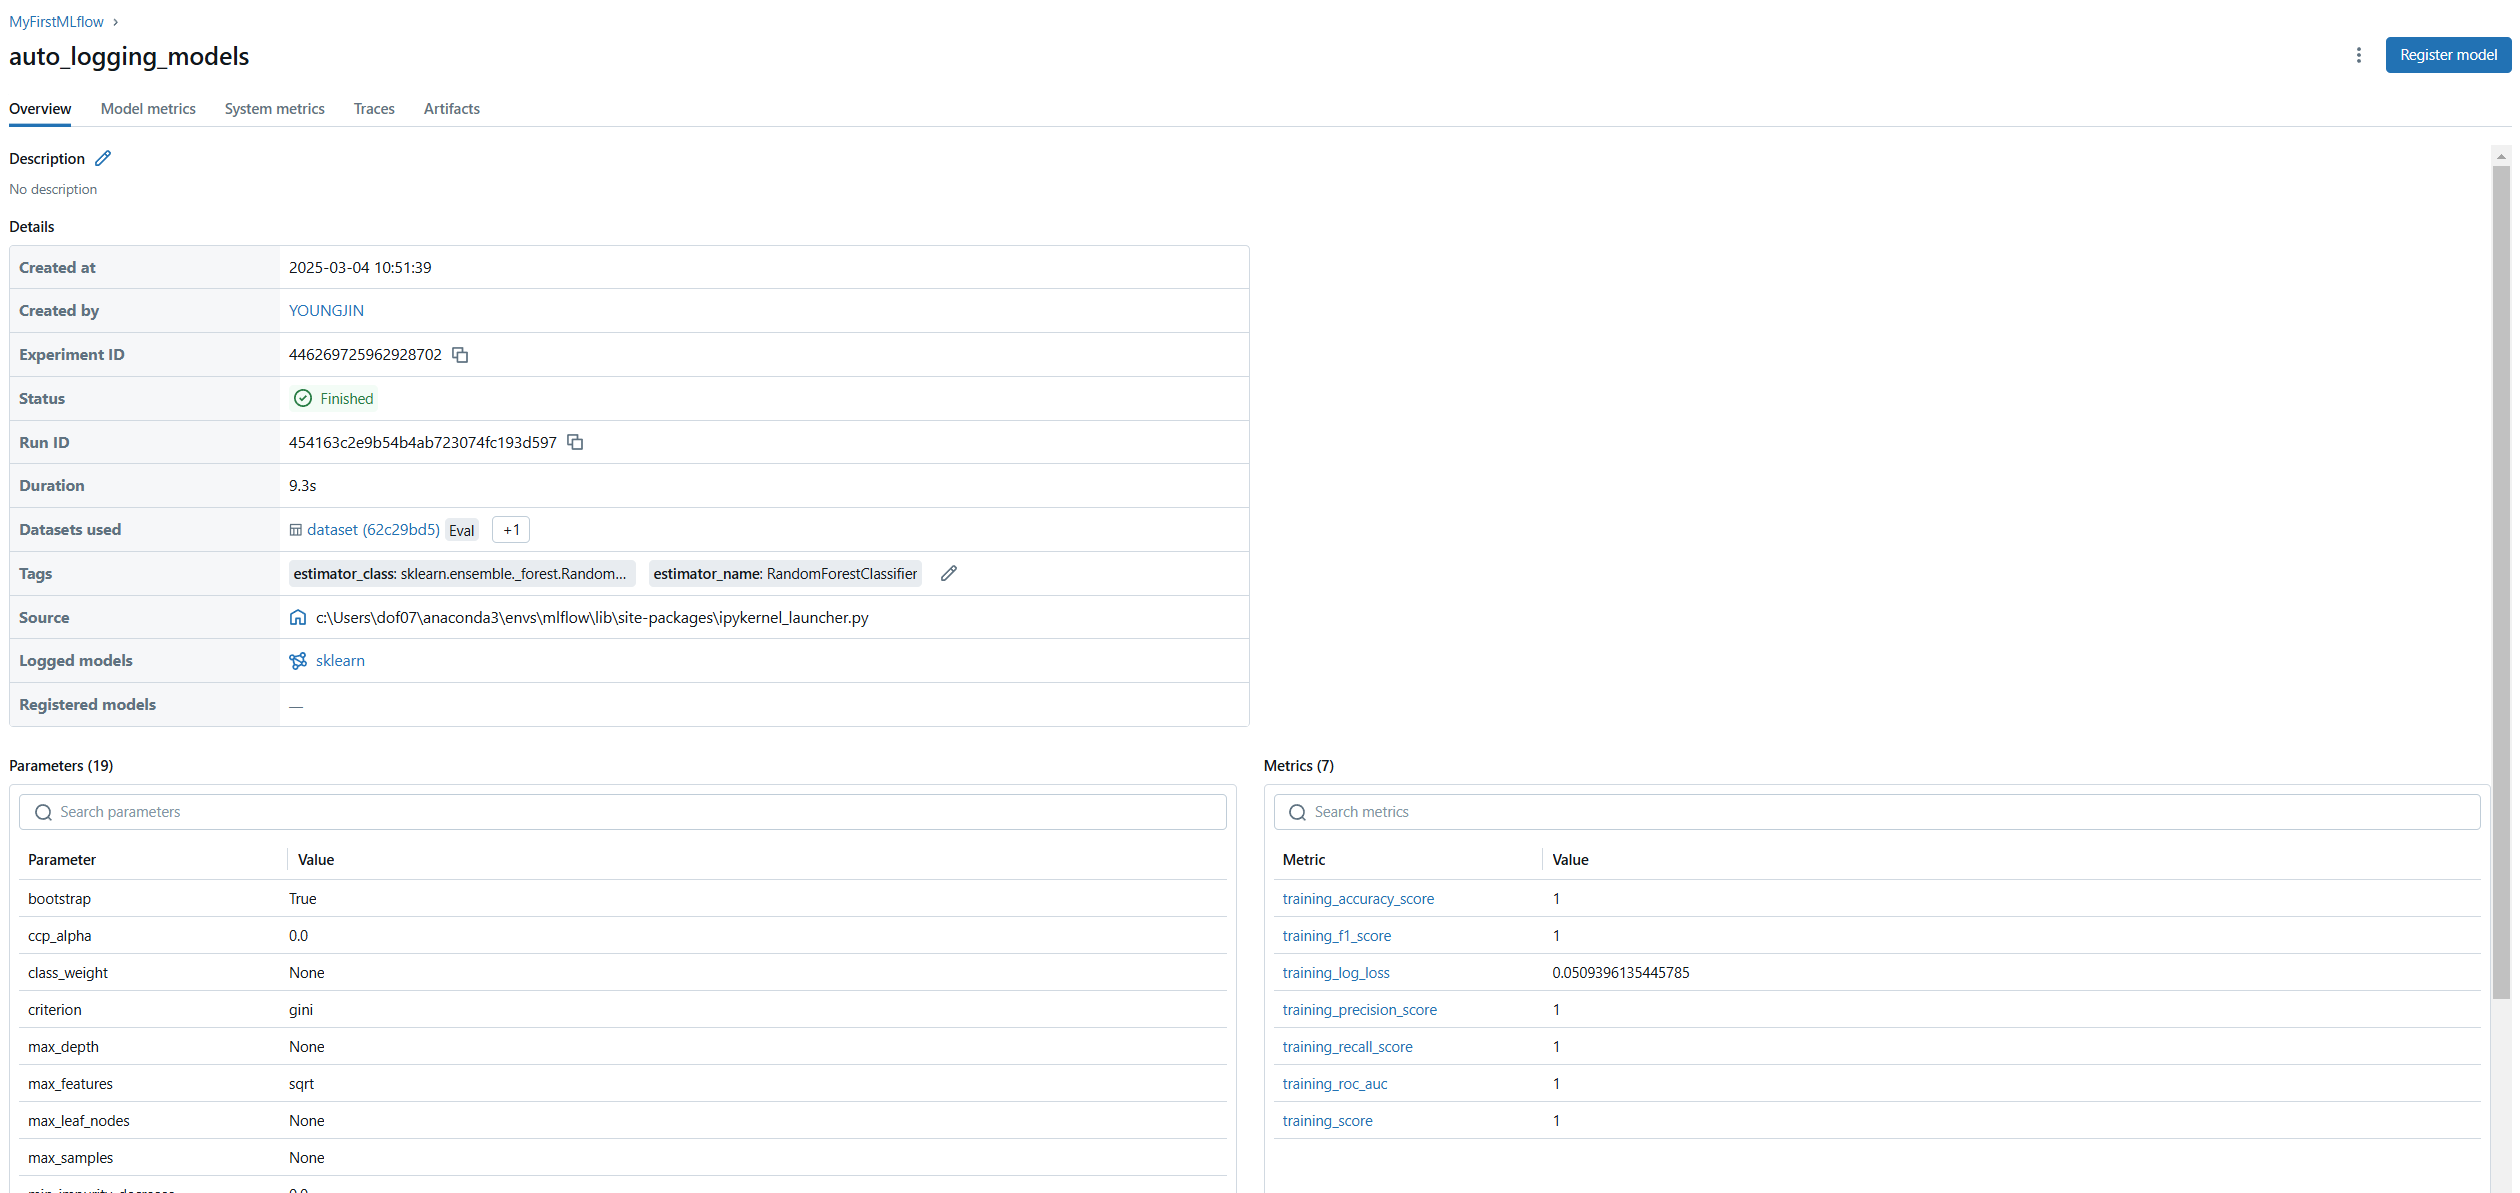
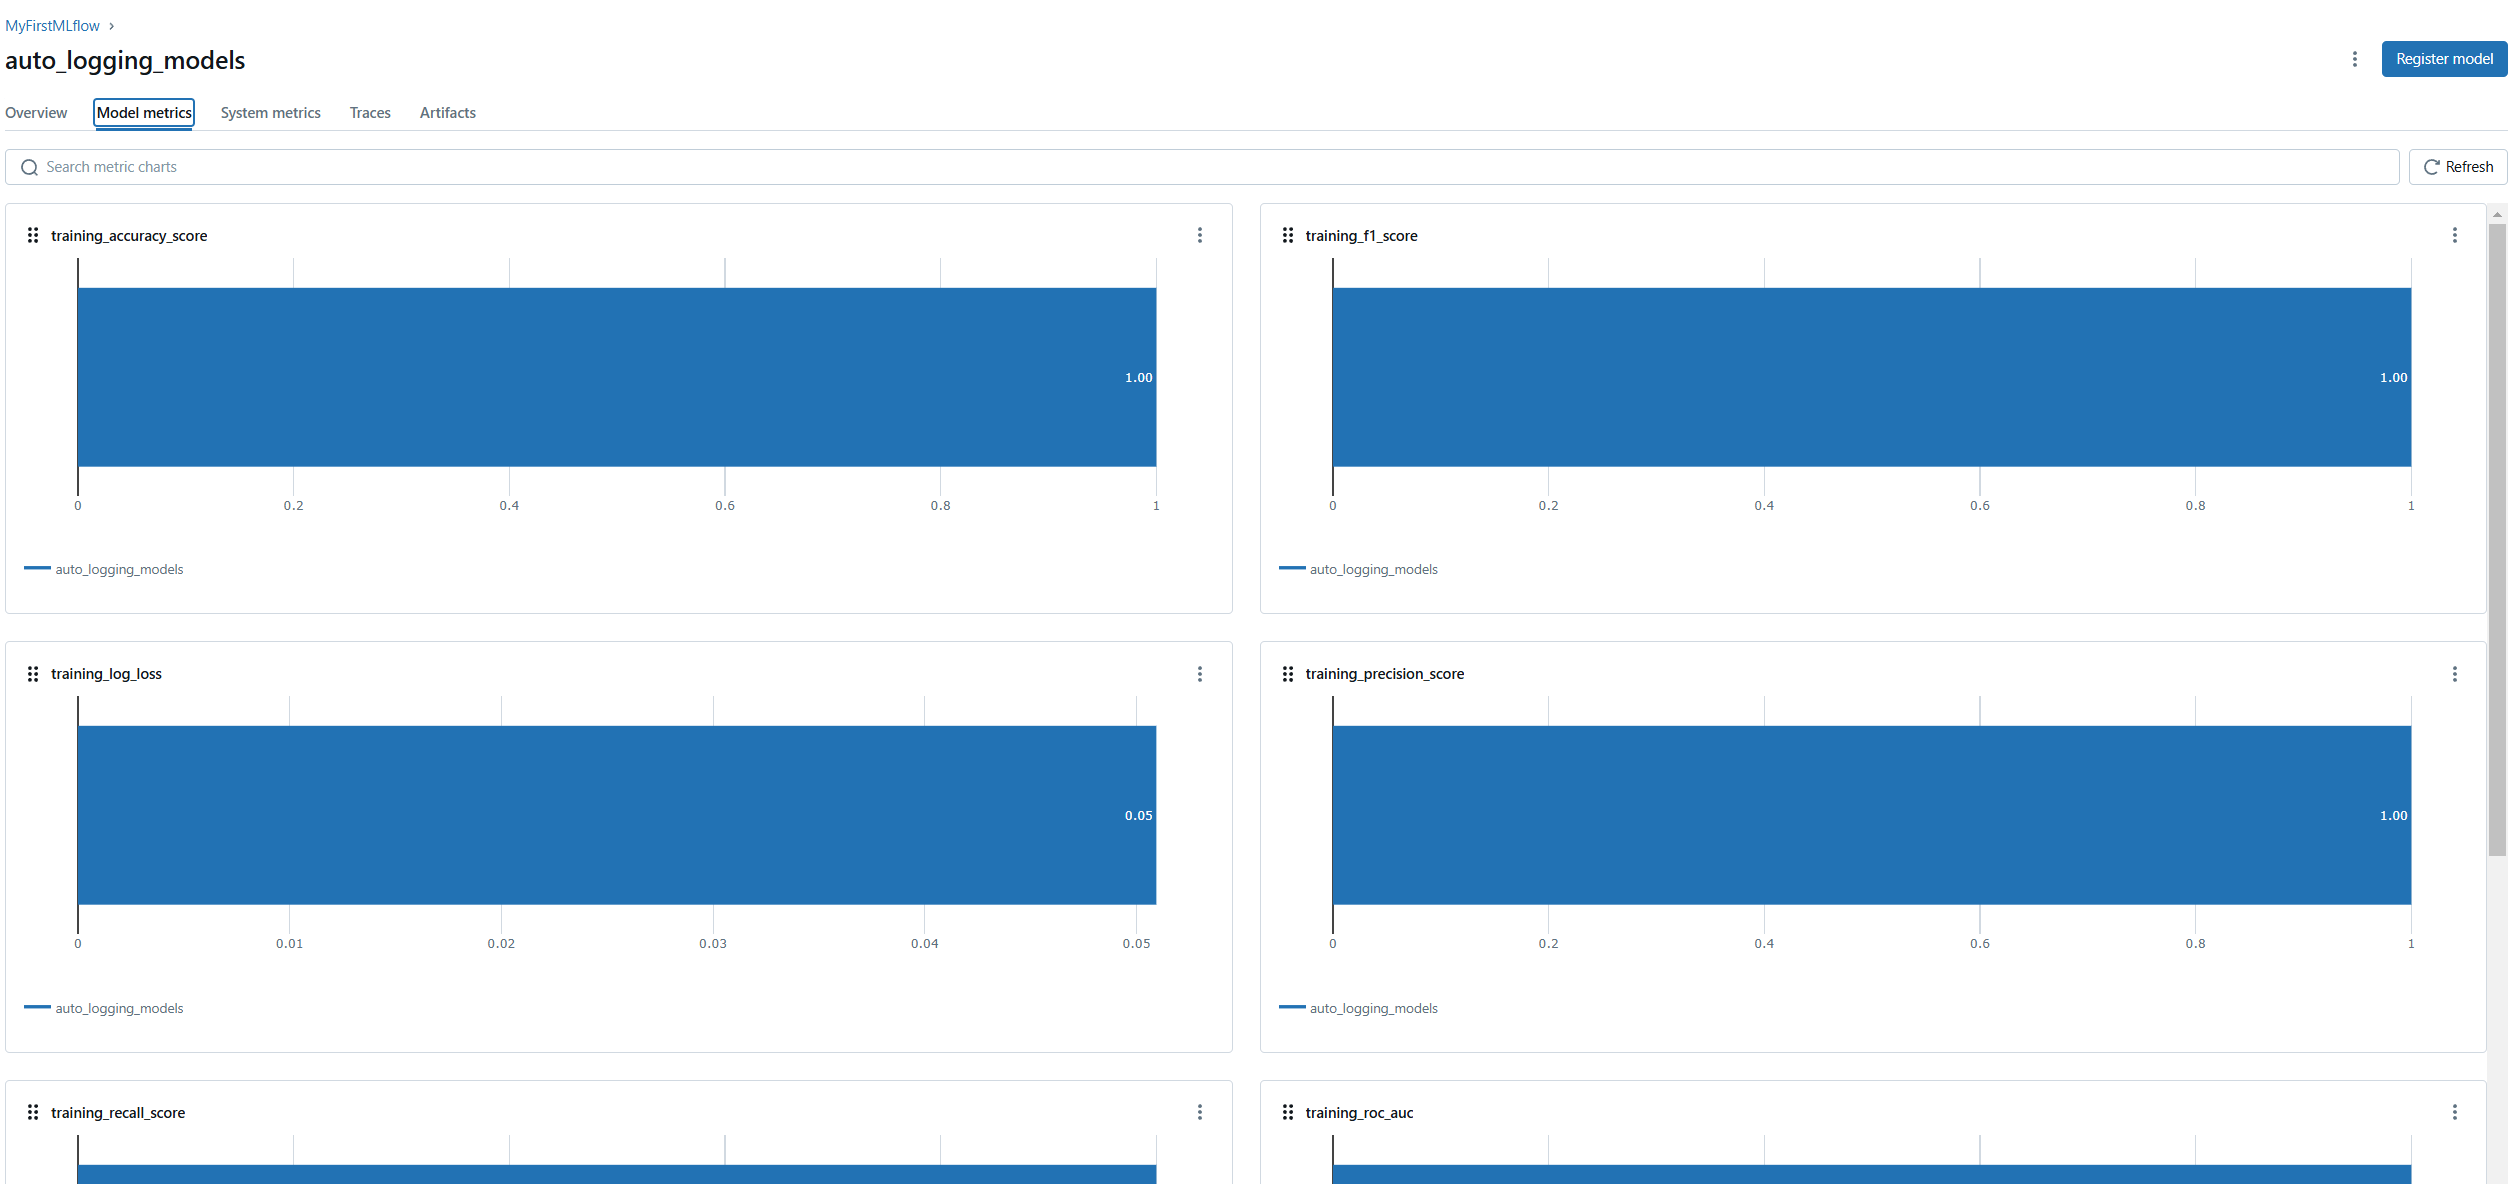
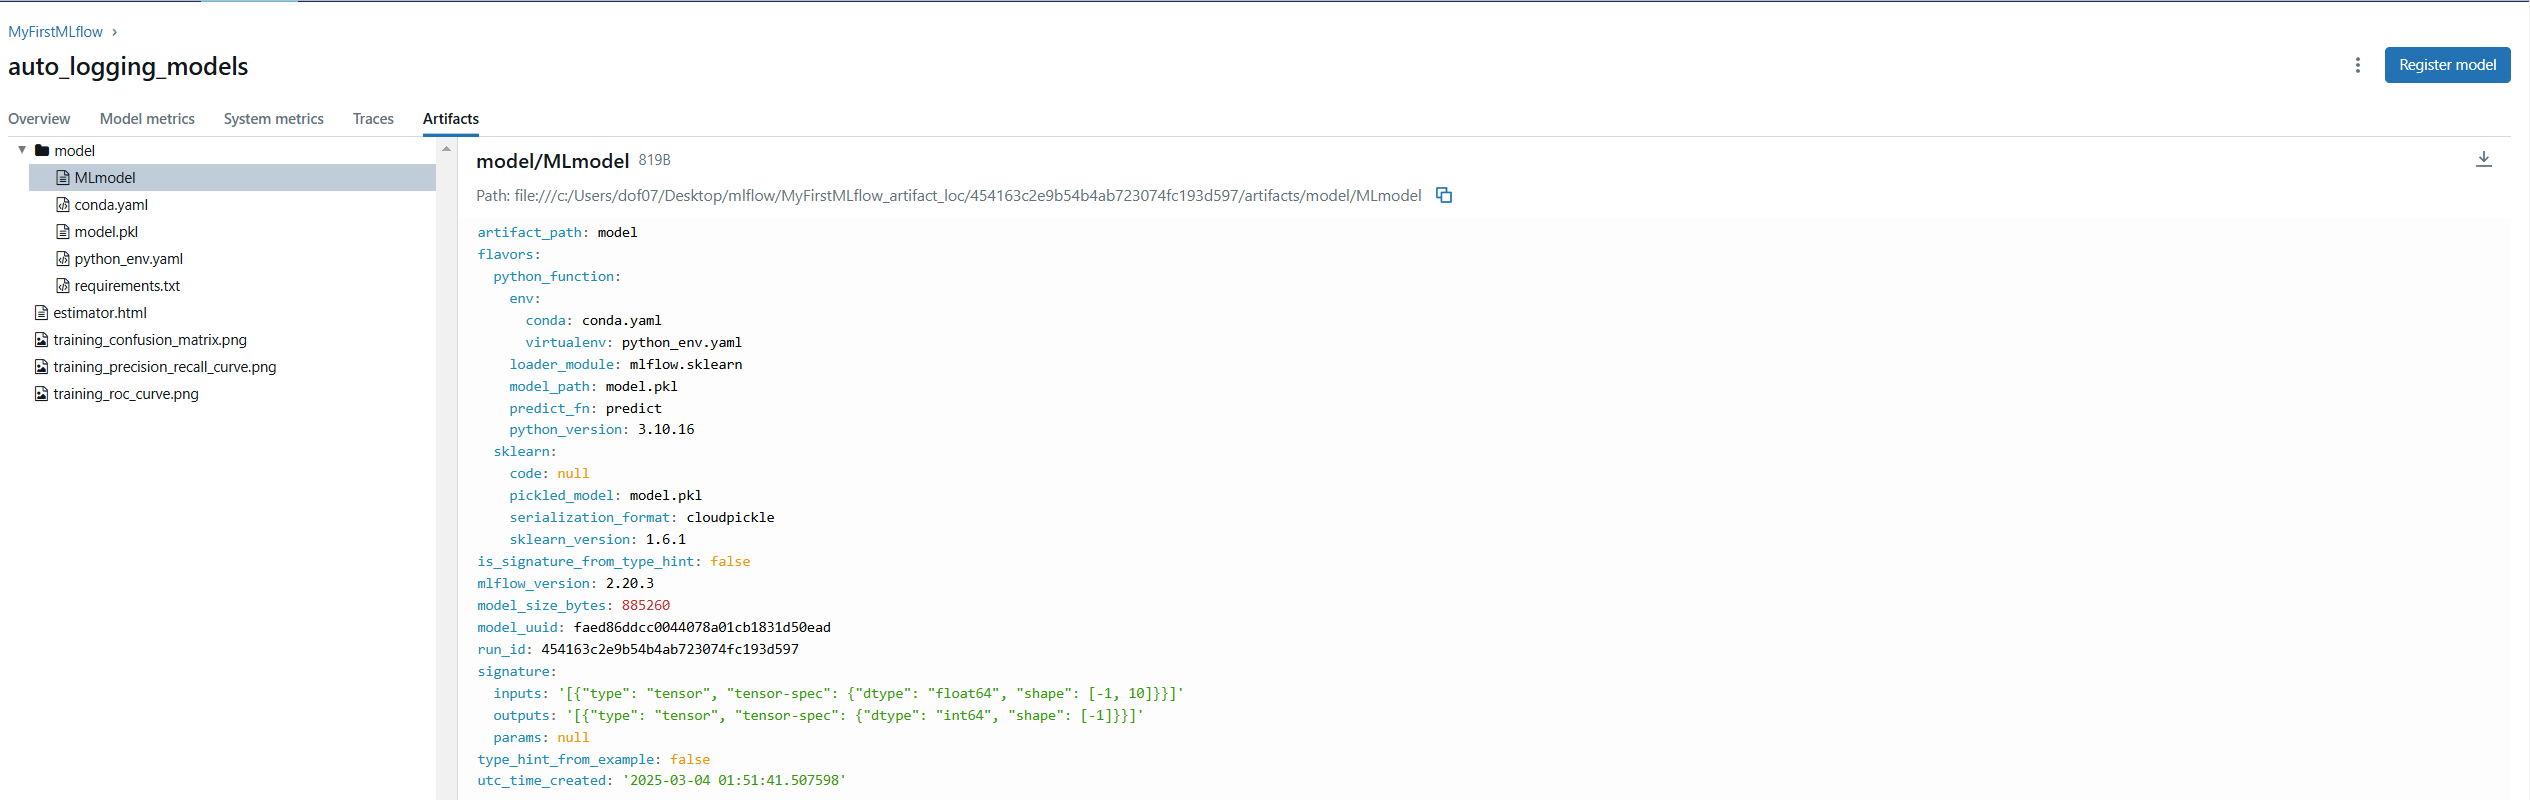

In [3]:

import mlflow
from mlflow_utils import get_mlflow_experiment

from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt 

if __name__=="__main__":
    experiment = get_mlflow_experiment(experiment_name="MyFirstMLflow")
    print("Name: {}".format(experiment.name))

    with mlflow.start_run(run_name="logging_models", experiment_id=experiment.experiment_id) as run:

        X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Log model parametres
        # mlflow.autolog()
        # mlflow.sklearn.autolog()

        # Random Forest
        rfc = RandomForestClassifier(n_estimators=100, random_state=42)
        rfc.fit(X_train, y_train)
        y_pred = rfc.predict(X_test)

        # More control than "mlflow.autolog()"
        mlflow.sklearn.log_model(sk_model=rfc, artifact_path = "random_forest_classifier")

        # Print run info
        print("Run ID: {}".format(run.info.run_id), "\n",
              "Experiment ID: {}".format(run.info.experiment_id), "\n",
              "Status: {}".format(run.info.status), "\n",
              "Start time: {}".format(run.info.start_time), "\n",
              "End time: {}".format(run.info.end_time), "\n",
              "Lifecycle_stage: {}".format(run.info.lifecycle_stage))

Name: MyFirstMLflow


2025/03/04 10:55:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: 6a6375ef3ad642539ff97bbe62383bce 
 Experiment ID: 446269725962928702 
 Status: RUNNING 
 Start time: 1741053307749 
 End time: None 
 Lifecycle_stage: active


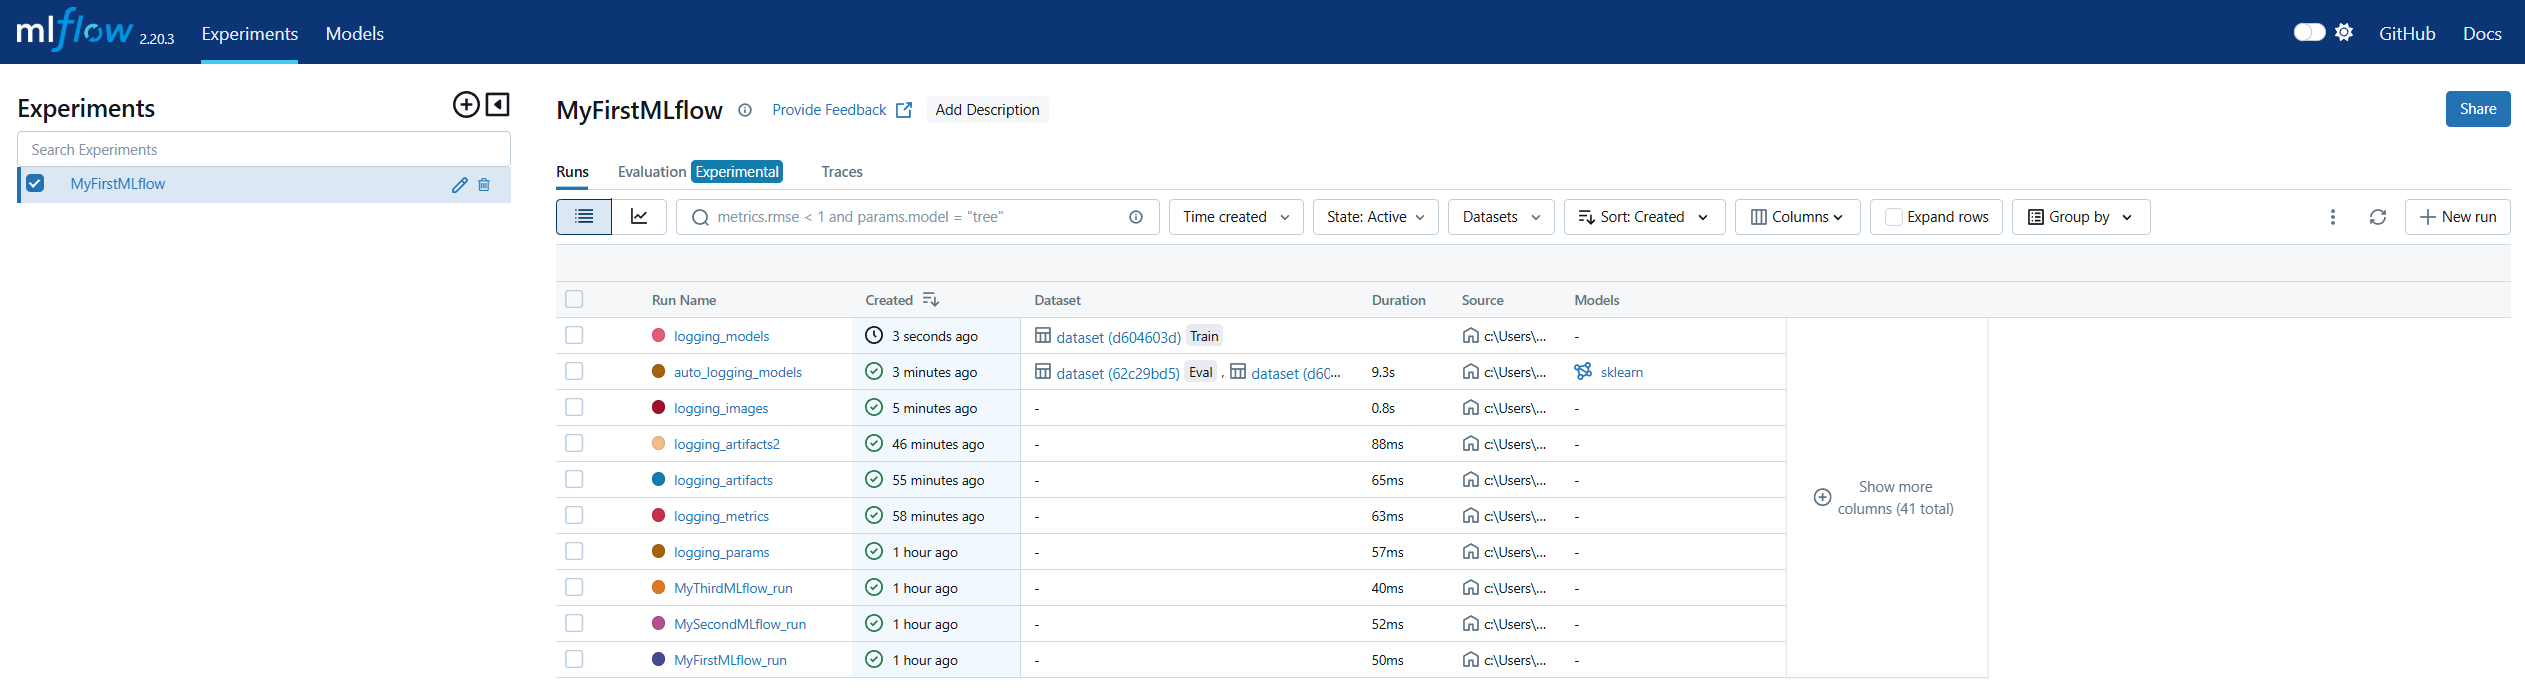

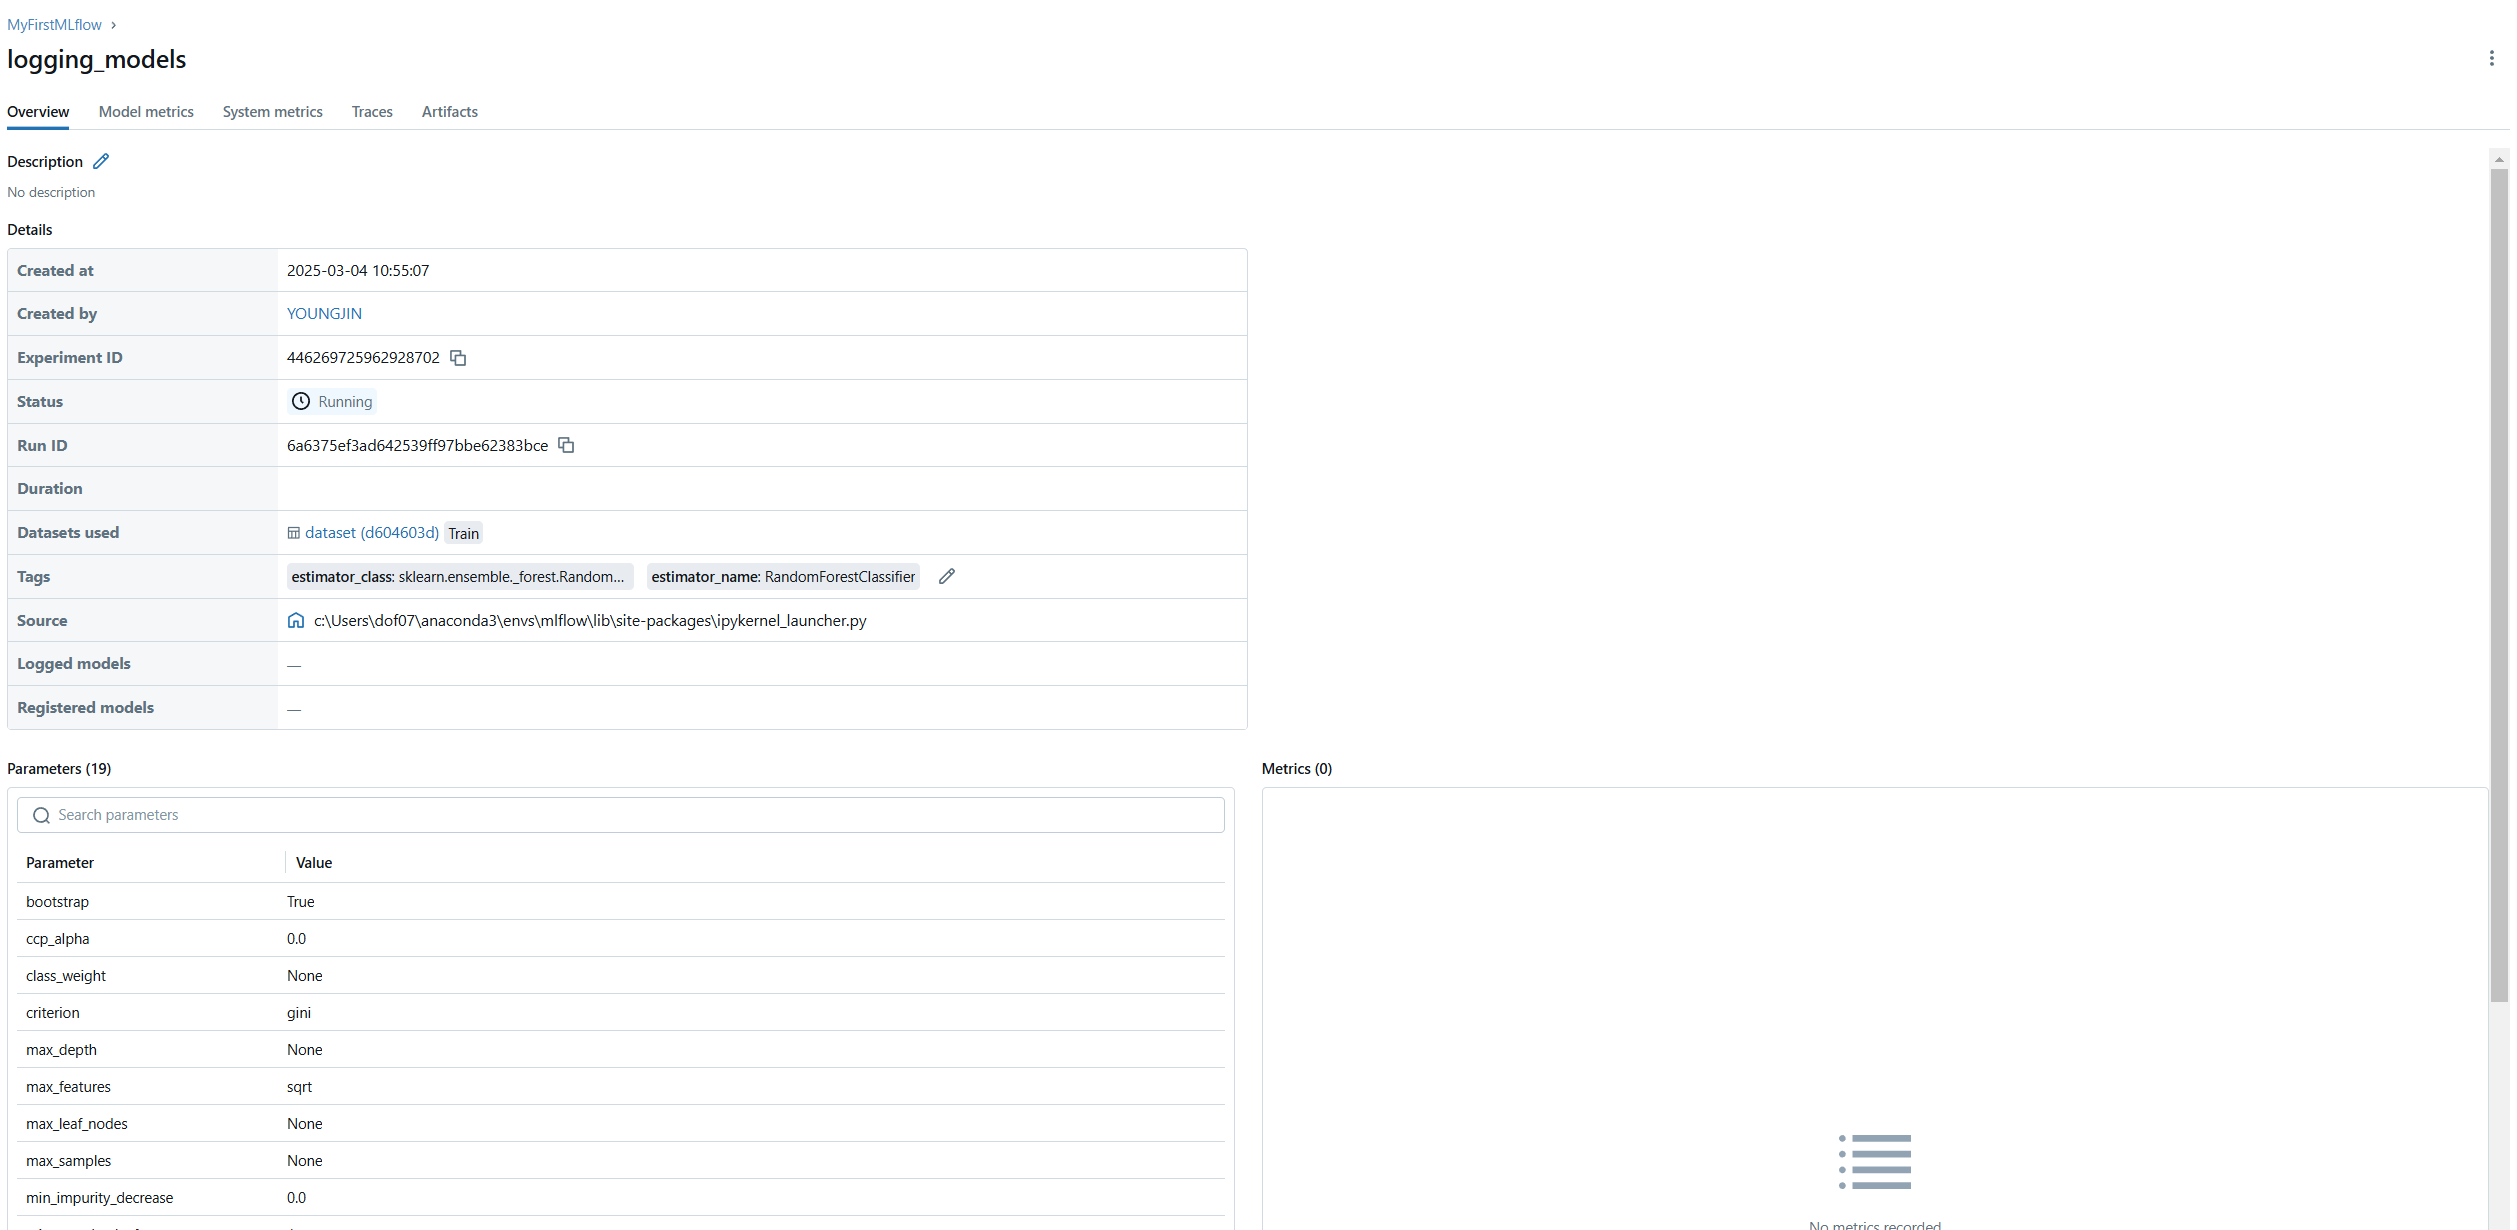


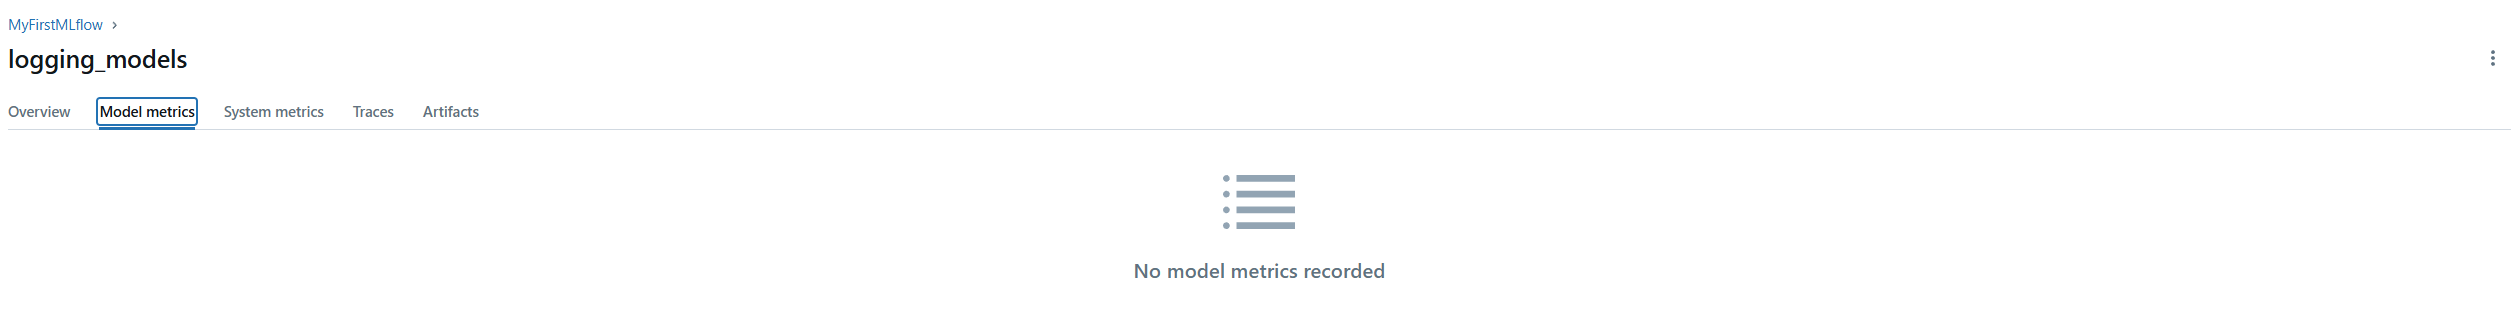

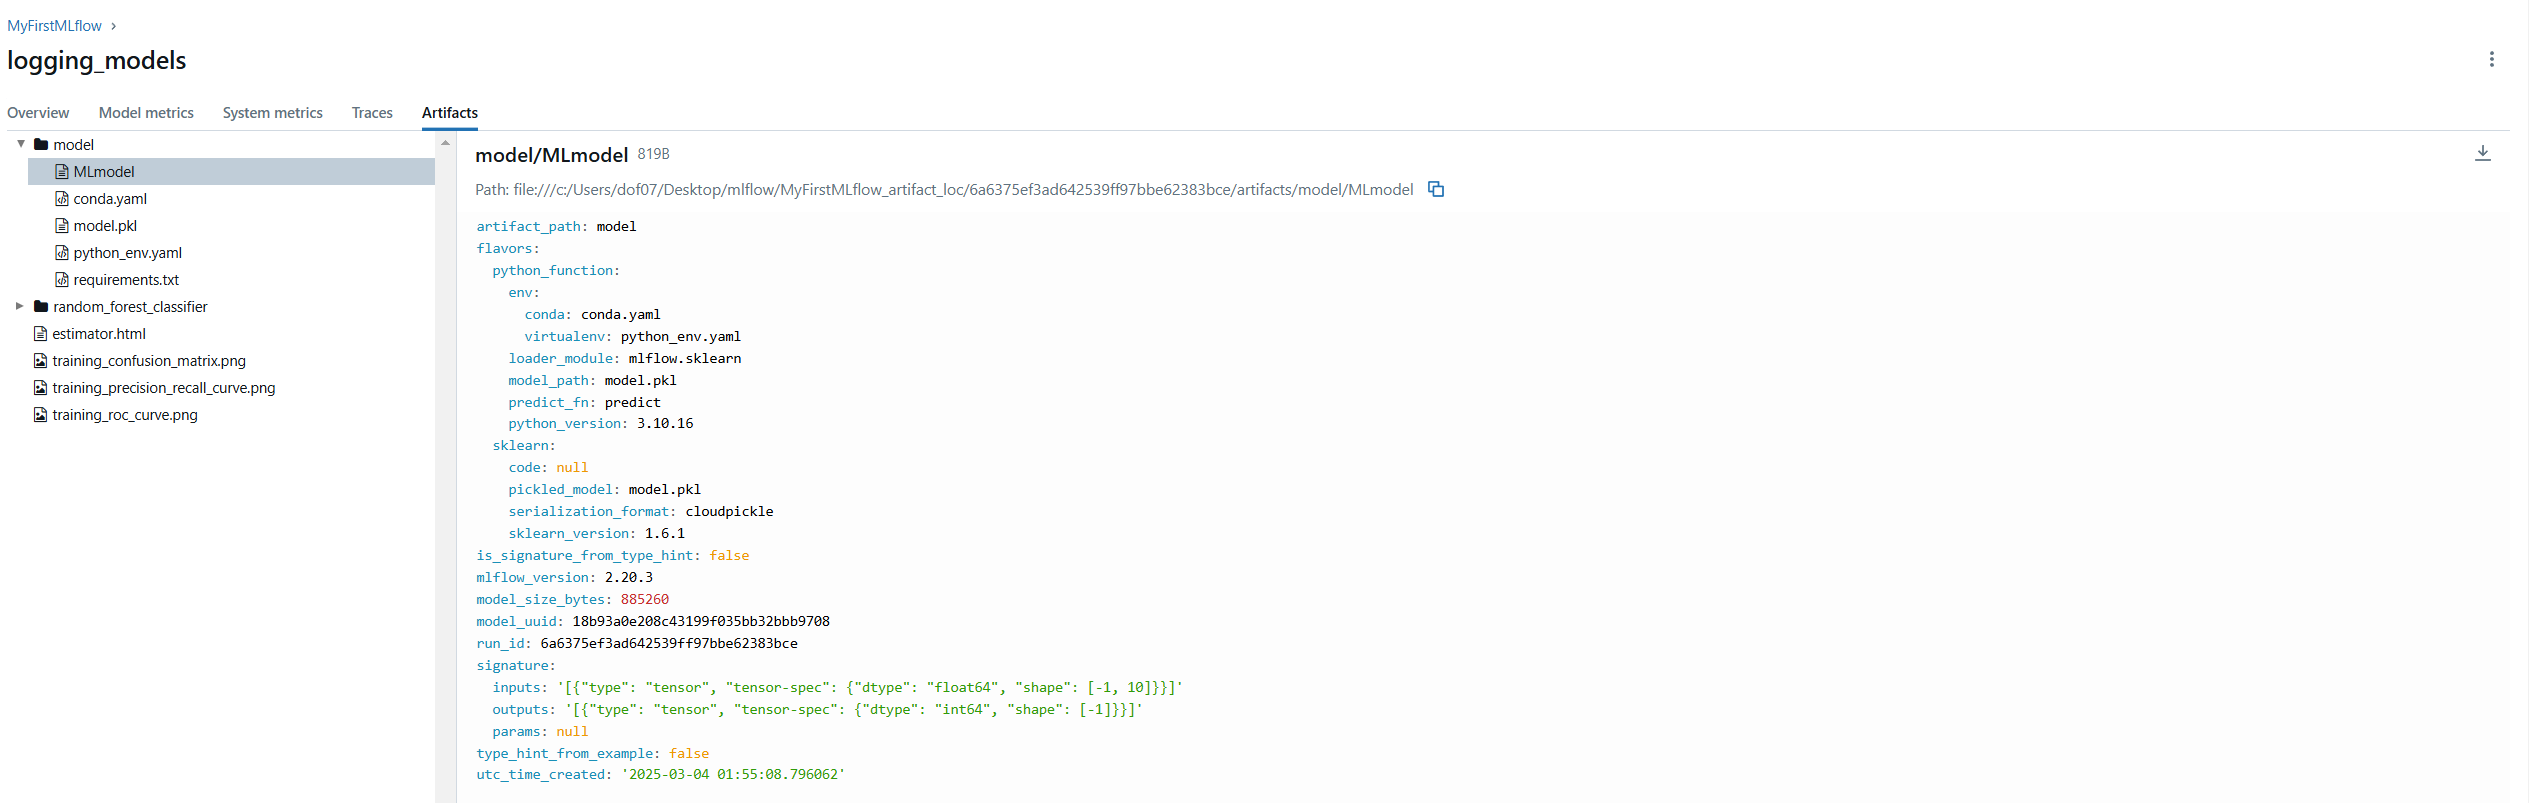